Voorbeeld notebook om met de dataportal van hkv.services te werken. Deze dataportal staat nu op de server van OMS Waddenzee en dus niet op een van HKV productieservers.

Allereerst, importeer de module als volgt:

In [1]:
from hkv.services import dataportal as dp

In de dataportal kunnen verschillende databases worden aangemaakt (`createDatabase`). In een bestaande database mogen entries worden:
- aangemaakt (`setEntry`)
- bijgewerkt (`updateEntry`)
- opgehaald (`getEntry`) of 
- verwijderd (`deleteEntry`)

Om een database uit te lezen moet er eerst een verbinding met de dataservice worden gemaakt. Anders is de dataservice niet bekend.

Een dataservice kan worden gezet met de `setDataservice` functie:

In [39]:
dp.setDataservice(dataservice = 'http://85.17.82.66/dataservices/')

dataservice is set. http://85.17.82.66/dataservices/ will be used as portal


Om te starten maak je een database aan

In [40]:
dp.createDatabase(database = 'demoDatabase')

{'exception': 'database name already exists'}

Met `listDatabase` kan je uitlezen wat er in de database zit. Dit is nu nog niets:

In [41]:
dp.listDatabase(database = 'demoDatabase')

[]

Een nieuwe entry kan toegevoegd worden met `setEntryDatabase`, deze heeft de volgende parameters nodig:
- database = (str) naam van de database in kwestie
- key = (str) naam waaronder de entry weer opgevraagd kan worden
- data = (str) het dataobject (wanneer de data later in een visualisatie gebruikt wordt moet dit row-oriented JSON zijn ['records'-style in pandas]).
- description = (str) beschrijving van de entry

In [42]:
dp.setEntryDatabase(database = 'demoDatabase', 
                    key = 'array4digits', 
                    data = '[1,2,3,4]', 
                    description = 'array van getallen')

{'date': '2017-11-20 09:47:56',
 'id': '453beef5-aa55-4796-b93c-cb83b3446e72',
 'key': 'array4digits'}

Deze data kan weer uitgelezen worden met `getEntryDatabase`. Hiervoor zijn alleen de `database` en `key` van belang. De functie toont ook de URL waarmee de data direct vanuit de browser of andere omgevingen en scripts uitgelezen kan worden.

In [43]:
dp.getEntryDatabase(database = 'demoDatabase', 
                    key = 'array4digits')

http://85.17.82.66/dataservices/data.asmx/read?database=demoDatabase&key=array4digits


[1, 2, 3, 4]

Met `updateEntryDatabase` kan een bestaande entry bijgewerkt worden. De entry wordt in z'n geheel vernieuwd. Hier zit geen append of prepend functionaliteit

In [44]:
dp.updateEntryDatabase(database = 'demoDatabase', 
                       key = 'array4digits', 
                       data = '[5,6,7,8]', 
                       description = 'array van nieuwe getallen')

{'database': 'demoDatabase', 'recordsaffected': '1', 'version': '0.2.0.0'}

Met de listDatabase functie is zichtbaar dat er een enkel entry in de database zit.

In [45]:
dp.listDatabase(database = 'demoDatabase')

[{'date': '2017-11-20 09:48:29',
  'description': 'array van nieuwe getallen',
  'id': '453beef5-aa55-4796-b93c-cb83b3446e72',
  'key': 'array4digits'}]

Om een entry uit de database te verwijderen kan de `deleteEntryDatabase` functie gebruikt worden

In [46]:
dp.deleteEntryDatabase(database= 'demoDatabase', key='array4digits')

{'database': 'demoDatabase', 'recordsaffected': '1', 'version': '0.2.0.0'}

Double check om te kijken of de entry echt weg is

In [47]:
dp.listDatabase(database = 'demoDatabase')

[]

Voor Myanmar is een bestaande database. Deze heet `Myanmar`. En bevat voor alle locaties/parameters al een entry

In [48]:
dp.listDatabase(database = 'Myanmar')

[{'date': '2017-10-25 05:59:19',
  'description': 'meteo disdro locaties',
  'id': '00c8d632-192d-40c1-b6fa-2f12a33767f8',
  'key': 'locations_METEO_DISDRO'},
 {'date': '2017-10-25 05:59:28',
  'description': '',
  'id': '8028d292-6502-4180-97c2-e143e6c185f7',
  'key': 'P.GSOD|480010|mm'},
 {'date': '2017-10-25 05:59:28',
  'description': '',
  'id': '09d7098b-6be9-4207-bf0a-0d74ed5fe990',
  'key': 'P.GSOD|480040|mm'},
 {'date': '2017-10-25 05:59:28',
  'description': '',
  'id': 'aeaa19fb-27aa-4759-b490-186dc89d530b',
  'key': 'P.GSOD|480080|mm'},
 {'date': '2017-10-25 05:59:28',
  'description': '',
  'id': 'ca89740d-ab63-4b4f-8d91-e6e57a716082',
  'key': 'P.GSOD|480100|mm'},
 {'date': '2017-10-25 05:59:28',
  'description': '',
  'id': 'ec4ac3ff-75cb-4f41-9fbf-1387cde52680',
  'key': 'P.GSOD|480180|mm'},
 {'date': '2017-10-25 05:59:28',
  'description': '',
  'id': 'afdbc7c2-ab9f-4898-9f77-e0226d2706f1',
  'key': 'P.GSOD|480190|mm'},
 {'date': '2017-10-25 05:59:28',
  'description':

En een entry kan uitgelezen worden

In [49]:
precipData = dp.getEntryDatabase(database='Myanmar',key='P.GSOD|480010|mm')
precipData

http://85.17.82.66/dataservices/data.asmx/read?database=Myanmar&key=P.GSOD|480010|mm


[{'date': '2017-01-06T00:00:00.000Z',
  'flag': 0.0,
  'locationId': '480010',
  'moduleId': 'ImportGSOD',
  'parameterId': 'P.GSOD',
  'stationName': 'PUTAO',
  'units': 'mm',
  'value': 0.0},
 {'date': '2017-01-07T00:00:00.000Z',
  'flag': 0.0,
  'locationId': '480010',
  'moduleId': 'ImportGSOD',
  'parameterId': 'P.GSOD',
  'stationName': 'PUTAO',
  'units': 'mm',
  'value': 0.0},
 {'date': '2017-01-09T00:00:00.000Z',
  'flag': 0.0,
  'locationId': '480010',
  'moduleId': 'ImportGSOD',
  'parameterId': 'P.GSOD',
  'stationName': 'PUTAO',
  'units': 'mm',
  'value': 0.0},
 {'date': '2017-01-10T00:00:00.000Z',
  'flag': 0.0,
  'locationId': '480010',
  'moduleId': 'ImportGSOD',
  'parameterId': 'P.GSOD',
  'stationName': 'PUTAO',
  'units': 'mm',
  'value': 0.0},
 {'date': '2017-01-11T00:00:00.000Z',
  'flag': 0.0,
  'locationId': '480010',
  'moduleId': 'ImportGSOD',
  'parameterId': 'P.GSOD',
  'stationName': 'PUTAO',
  'units': 'mm',
  'value': 0.0},
 {'date': '2017-01-12T00:00:00

Of gelijk met de pandas module

In [50]:
import pandas as pd
%matplotlib inline

In [51]:
df = pd.read_json('http://85.17.82.66/dataservices/data.asmx/read?database=Myanmar&key=P.GSOD|480010|mm', orient='records')

In [52]:
df.set_index('date', inplace=True)

In [54]:
df.head()

,flag,locationId,moduleId,parameterId,stationName,units,value
date,,,,,,,
2017-01-06,0,480010,ImportGSOD,P.GSOD,PUTAO,mm,0.0
2017-01-07,0,480010,ImportGSOD,P.GSOD,PUTAO,mm,0.0
2017-01-09,0,480010,ImportGSOD,P.GSOD,PUTAO,mm,0.0
2017-01-10,0,480010,ImportGSOD,P.GSOD,PUTAO,mm,0.0
2017-01-11,0,480010,ImportGSOD,P.GSOD,PUTAO,mm,0.0


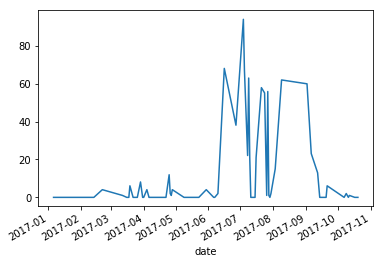

In [55]:
df['value'].plot()